## A First Look at Estimating Violent Crime Using Murder Rate
#### Daniel Verdear for Safe-esteem

A fundamental dilemma faced in the data interpretation stage of Safe-esteem's development is the lack of consistent data on violent crime. The definition and reliability of violent crime data varies based on the jurisdiction, so finding a proxy for violent crime will be useful to simplify the data analysis. Across the world, data for homicides is accurately published. As far as data analysis is concerned, this would be a very useful proxy if it can be shown that homicide rates correlate with violent crime rates.

We will examine this possible correlation using Python.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('estimated_crimes.csv')
print(df.shape)
df.head()

(1196, 16)


,year,state_id,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1995,NaN,NaN,NaN,262803276,1798792,21606,97470,NaN,580509,1099207,12063935,2593784,7997710,1472441,NaN
1,1996,NaN,NaN,NaN,265228572,1688540,19645,96252,NaN,535594,1037049,11805323,2506400,7904685,1394238,NaN
2,1997,NaN,NaN,NaN,267783607,1636099,18211,96153,NaN,498534,1023201,11558975,2461026,7743760,1354189,NaN
3,1998,NaN,NaN,NaN,270248003,1533887,16974,93144,NaN,447186,976583,10951827,2332735,7376311,1242781,NaN
4,1999,NaN,NaN,NaN,272690813,1426044,15522,89411,NaN,409371,911740,10208334,2100739,6955520,1152075,NaN


In [3]:
print(df['year'].unique())
print(df['state_abbr'].unique())

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017]
[nan 'AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unfortunately, Florida is one of the approximately dozen states that only reports violent crime data using the Summary Reporting System (SRS). The data that can be collected for Florida will be more limited than is available in other states, but the SRS dataset imported above includes data for every state as well as national aggregates.

We will begin our analysis with Florida.

In [4]:
FL = df[df['state_abbr'] == 'FL']
FL.head()

,year,state_id,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
230,1995,12.0,FL,Florida,14166000,151711,1037,6887,NaN,42485,101302,939288,215657,612311,111320,NaN
231,1996,12.0,FL,Florida,14400000,151350,1077,7508,NaN,41643,101122,928273,219056,605448,103769,The state UCR Program was unable to provide co...
232,1997,12.0,FL,Florida,14654000,149996,1012,7599,NaN,40459,100926,915613,213926,594492,107195,NaN
233,1998,12.0,FL,Florida,14916000,140016,967,7404,NaN,36198,95447,887107,203105,579752,104250,NaN
234,1999,12.0,FL,Florida,15111244,129044,859,6990,NaN,31969,89226,808674,181378,534105,93191,NaN


We will use the pairwise correlation function of pandas to test the correlation between 'violent_crime' and 'homicide'. We will be using the function defaults, which use the standard Pearson correlation coefficient.

We will then visualize these two columns to verify the correlation visually.

In [16]:
print("Correlation coefficient for violent crime: "+str(FL['homicide'].corr(FL['violent_crime'])))
print("R-squared: "+str(FL['homicide'].corr(FL['violent_crime'])**2))
print("Correlation coefficient for Rape: "+str(FL['homicide'].corr(FL['rape_legacy'])))
print("R-squared: "+str(FL['homicide'].corr(FL['rape_legacy'])**2))
print("Correlation coefficient for Robbery: "+str(FL['homicide'].corr(FL['robbery'])))
print("R-squared: "+str(FL['homicide'].corr(FL['robbery'])**2))
print("Correlation coefficient for Aggravated Assault: "+str(FL['homicide'].corr(FL['aggravated_assault'])))
print("R-squared: "+str(FL['homicide'].corr(FL['aggravated_assault'])**2))

Correlation coefficient for violent crime: -0.05797180127331061
R-squared: 0.003360729742872217
Correlation coefficient for Rape: -0.14737186102664349
R-squared: 0.021718465422456323
Correlation coefficient for Robbery: 0.11453360393689127
R-squared: 0.013117946430772676
Correlation coefficient for Aggravated Assault: -0.14505303118314977
R-squared: 0.02104038185541982


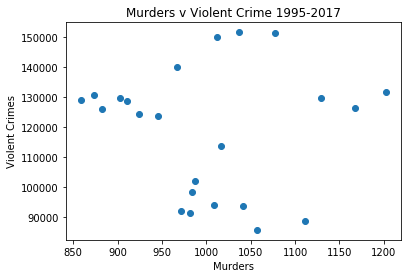

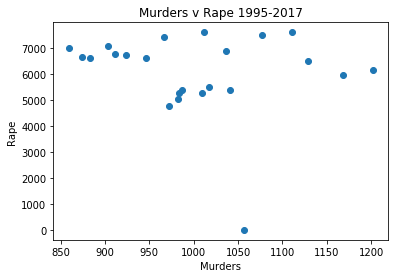

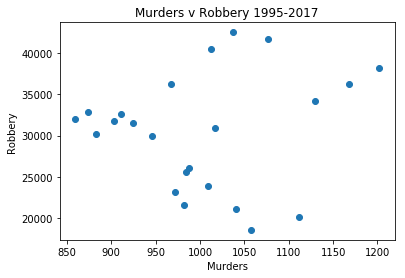

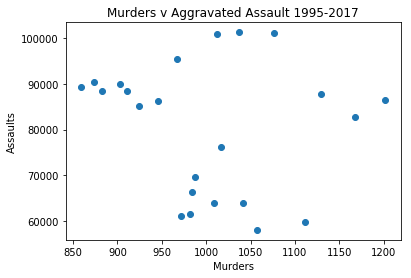

In [15]:
plt.scatter(FL['homicide'],FL['violent_crime'])
plt.title('Murders v Violent Crime 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Violent Crimes')
plt.show()
plt.scatter(FL['homicide'],FL['rape_legacy'])
plt.title('Murders v Rape 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Rape')
plt.show()
plt.scatter(FL['homicide'],FL['robbery'])
plt.title('Murders v Robbery 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Robbery')
plt.show()
plt.scatter(FL['homicide'],FL['aggravated_assault'])
plt.title('Murders v Aggravated Assault 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Assaults')
plt.show()

If there's a correlation between these datapoints, it surely is not linear...

The correlation coefficient for these two variables is nearly 0. That means that there is not discernable linear relationship between the two values. For completeness, we will still carry out these experiments on the national aggregates.

In [7]:
usa = df[df.state_abbr.isnull()]

In [17]:
print("Correlation coefficient for violent crime: "+str(usa['homicide'].corr(usa['violent_crime'])))
print("R-squared: "+str(usa['homicide'].corr(usa['violent_crime'])**2))
print("Correlation coefficient for Rape: "+str(usa['homicide'].corr(usa['rape_legacy'])))
print("R-squared: "+str(usa['homicide'].corr(usa['rape_legacy'])**2))
print("Correlation coefficient for Robbery: "+str(usa['homicide'].corr(usa['robbery'])))
print("R-squared: "+str(usa['homicide'].corr(usa['robbery'])**2))
print("Correlation coefficient for Aggravated Assault: "+str(usa['homicide'].corr(usa['aggravated_assault'])))
print("R-squared: "+str(usa['homicide'].corr(usa['aggravated_assault'])**2))

Correlation coefficient for violent crime: 0.8658986142015053
R-squared: 0.7497804100760873
Correlation coefficient for Rape: 0.7940258939826257
R-squared: 0.6304771203149079
Correlation coefficient for Robbery: 0.7917047257617789
R-squared: 0.6267963727935335
Correlation coefficient for Aggravated Assault: 0.8311370804321869
R-squared: 0.6907888464693396


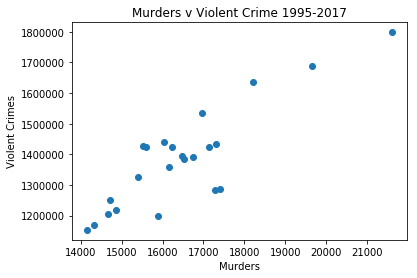

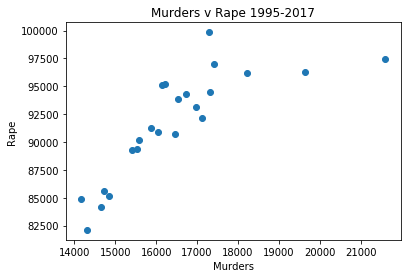

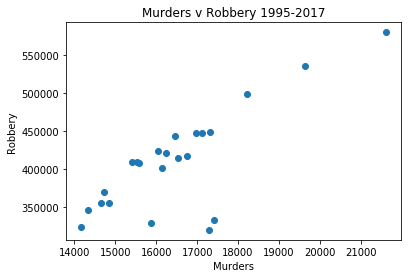

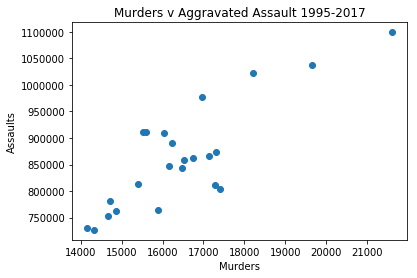

In [11]:
plt.scatter(usa['homicide'],usa['violent_crime'])
plt.title('Murders v Violent Crime 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Violent Crimes')
plt.show()
plt.scatter(usa['homicide'],usa['rape_legacy'])
plt.title('Murders v Rape 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Rape')
plt.show()
plt.scatter(usa['homicide'],usa['robbery'])
plt.title('Murders v Robbery 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Robbery')
plt.show()
plt.scatter(usa['homicide'],usa['aggravated_assault'])
plt.title('Murders v Aggravated Assault 1995-2017')
plt.xlabel('Murders')
plt.ylabel('Assaults')
plt.show()

### Conclusion

Interstingly, the national aggregates have linear correlation. However, with Safe-esteem's focus on granular data, this finding will likely be of little use to the project. Moreover, the SRS system for data reporting is incredibly antiquated. It is set to be retired and replaced with a more robust system in 2021.

We conclude via this short study that a sufficiently large sample of data will show correlation between homicide rate and violent crime rate. However, the interest of Safe-esteem is at analyzing smaller samples to derive more granular insights. And, for the Florida sample, the correlation falls apart. Therefore, we should continue searching for options to proxy violent crime rates on a small scale.